# POSTTEST 6 KB
## Unsupervised Learning
## Nama  : ANDI NUR FADILAH
## NIM   : 2109106015
## Kelas : INFORMATIKA A 2021

## Mengimport library yang digunakan

In [103]:
import pandas as pd
import seaborn as sns
import warnings

In [104]:
warnings.filterwarnings('ignore')

## Menampilkan informasi dari dataset

In [105]:
# Menampilkan informasi dari dataset
df = pd.read_csv("Top 2000 Universities of the World.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   World Rank                 2000 non-null   int64  
 1   Institution                2000 non-null   object 
 2   Country                    2000 non-null   object 
 3   National Rank              2000 non-null   int64  
 4   Quality of Education Rank  2000 non-null   object 
 5   Alumni Employment Rank     2000 non-null   object 
 6   Quality of Faculty Rank    2000 non-null   object 
 7   Research Performance Rank  2000 non-null   object 
 8   Score                      2000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 140.8+ KB


## Menampilkan 10 Data Pertama pada Dataset

In [106]:
# Menampilkan 10 Data Pertama pada Dataset
df = pd.read_csv("Top 2000 Universities of the World.csv")
df.head(10)

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,8,96.7
2,3,Stanford University,USA,3,10,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,Princeton University,USA,4,5,15,7,70,92.6
6,7,Columbia University,USA,5,11,14,10,15,92.0
7,8,University of Chicago,USA,6,8,16,27,22,91.5
8,9,University of Pennsylvania,USA,7,14,10,42,12,91.1
9,10,Yale University,USA,8,6,36,13,20,90.7


## Melakukan Data Cleaning pada Nilai NULL (JIKA ADA)

In [107]:
# Mengecek atribut mana yang memiliki Nilai NULL
df.isna().sum()

World Rank                   0
Institution                  0
Country                      0
National Rank                0
Quality of Education Rank    0
Alumni Employment Rank       0
Quality of Faculty Rank      0
Research Performance Rank    0
Score                        0
dtype: int64

## Melakukan Data Cleaning pada Nilai Duplikat (JIKA ADA)

In [108]:
df[df.duplicated()]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score


In [109]:
df.duplicated().sum()

0

## Data Scaling dan Subset

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
subset = df[['World Rank', 'National Rank']]

In [112]:
ss = StandardScaler()

In [113]:
x_scaling = ss.fit_transform(subset)

In [114]:
print(x_scaling)

[[-1.731185   -0.80044202]
 [-1.72945295 -0.78840946]
 [-1.7277209  -0.7763769 ]
 ...
 [ 1.7277209   2.50851212]
 [ 1.72945295 -0.17474888]
 [ 1.731185    2.52054468]]


## K-Means Clustering

In [115]:
# Mengimport KMeans
from sklearn.cluster import KMeans

In [116]:
# Membuat objek dari K-Means dengan jumlah cluster : 3
model = KMeans(n_clusters = 3)

In [117]:
# Melakukan fit terhadap model
model.fit(x_scaling)

KMeans(n_clusters=3)

In [118]:
# Menentukan label untuk cluster
labels = model.labels_

In [119]:
print(labels)

[1 1 1 ... 2 0 2]


### Evaluasi Hasil Pemodelan

In [120]:
# Membuat dataframe dengan labels dan country sebagai kolom
dfKmeans = pd.DataFrame({'labels': labels, 'Country': df.Country})

In [121]:
# Membuat crosstab: ct
ct = pd.crosstab(dfKmeans["labels"],dfKmeans["Country"])

In [122]:
print(ct)

Country  Algeria  Argentina  Armenia  Australia  Austria  Azerbaijan  \
labels                                                                 
0              2          7        0         13        7           1   
1              0          3        1         26       10           0   
2              0          0        0          0        0           0   

Country  Bangladesh  Belarus  Belgium  Brazil  ...  USA  Uganda  Ukraine  \
labels                                         ...                         
0                 1        0        2      34  ...    0       0        6   
1                 0        1        9      22  ...  159       1        0   
2                 0        0        0       0  ...  188       0        0   

Country  United Arab Emirates  United Kingdom  Uruguay  Venezuela  Vietnam  \
labels                                                                       
0                           2              32        0          1        5   
1                       

### Melihat centroid dari model yang sudah dibuat

In [123]:
# Mengimport visualisasi
import matplotlib.pyplot as plt

In [124]:
# mengambil semua baris pada kolom tertentu (dalam bentuk array)
xs = x_scaling[:,0]
ys = x_scaling[:,1]

In [125]:
# Menampung koordinat dari tiap centroid
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

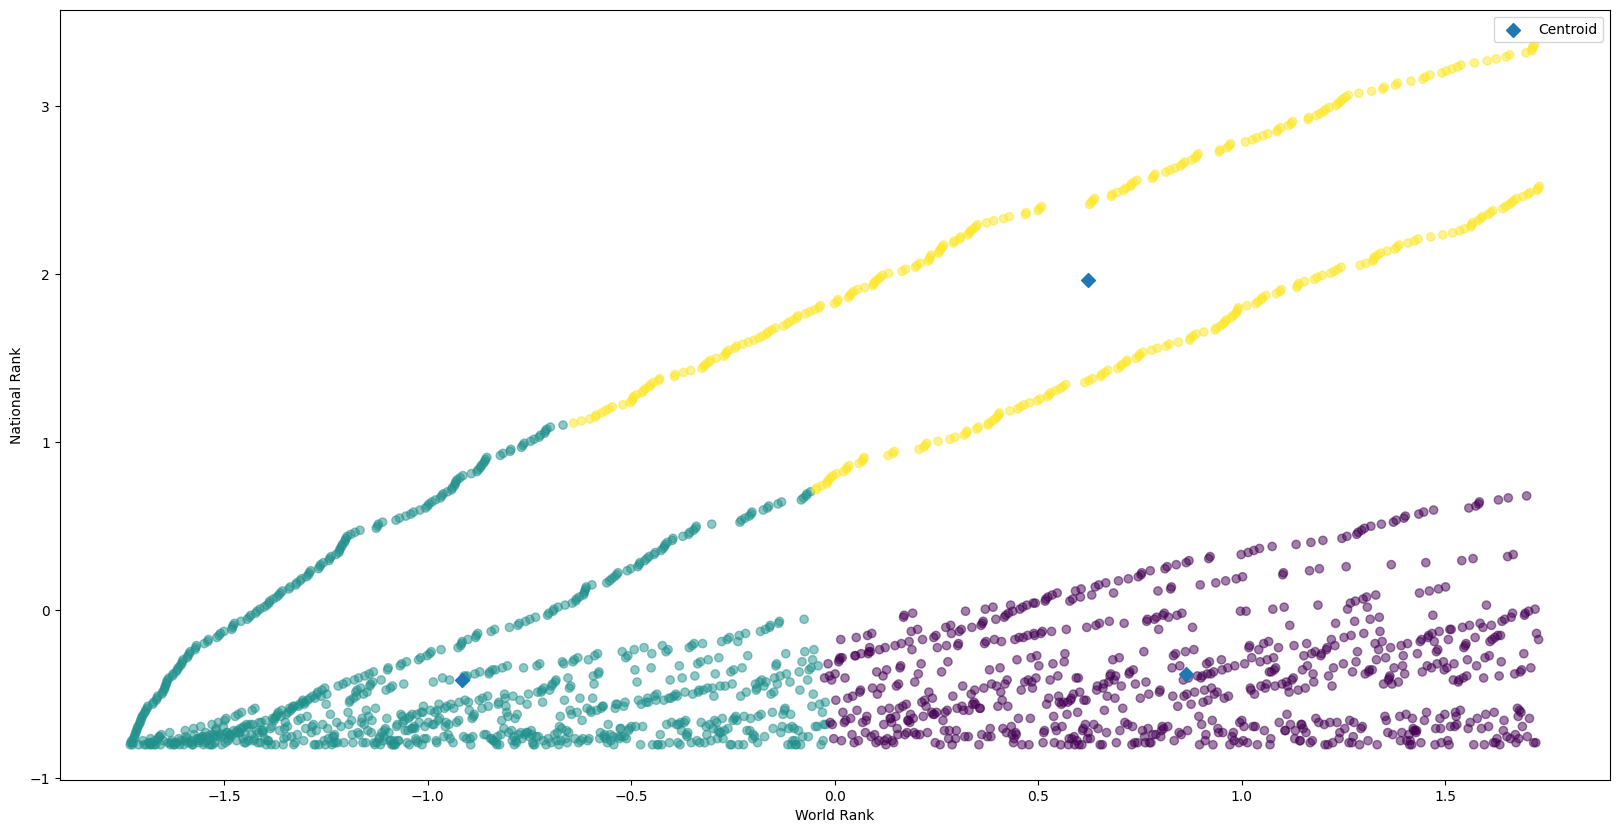

In [126]:
# Visualisasi Cluster
plt.figure(figsize=(20,10))

# Titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha = 0.5, c =  labels)

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, marker = "D", s = 50, label = "Centroid")

# Memberi label
plt.xlabel("World Rank")
plt.ylabel("National Rank")
plt.legend()
plt.show()

### Menentukan Jumlah Cluster (Elbow Method)

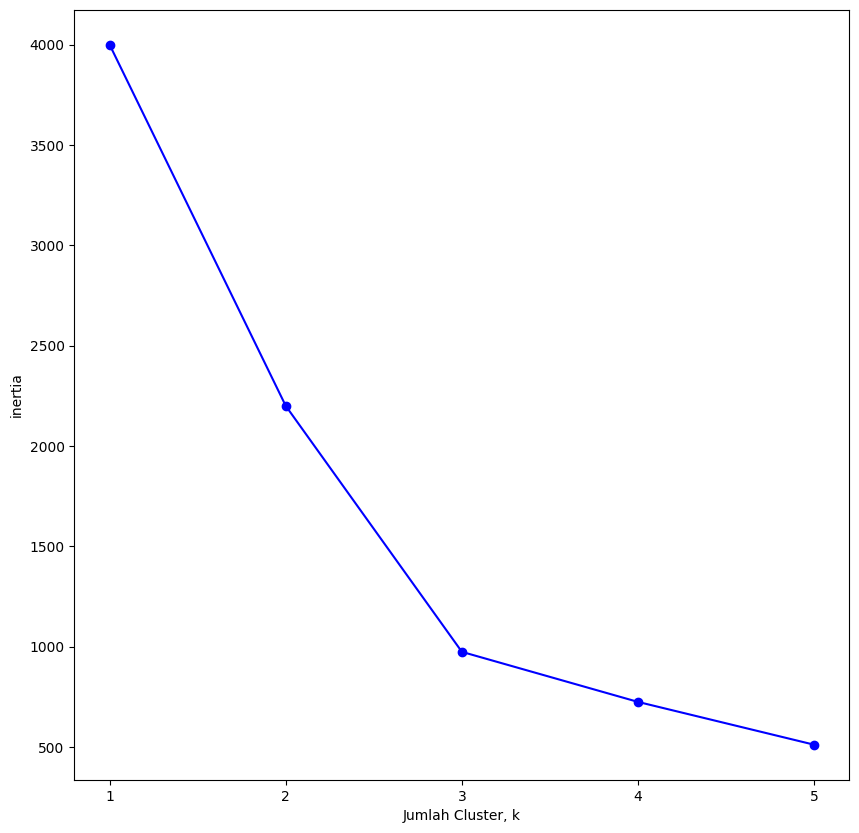

In [127]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaling)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o', color = "blue")
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()